In [1]:
from os import getcwd
import os.path as path

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pickle

In [2]:
data_dir = path.abspath(path.join(getcwd(), '../../'))

## MNIST fewshot

V1 0.27066
classical 0.33024
mistuned 0.37032


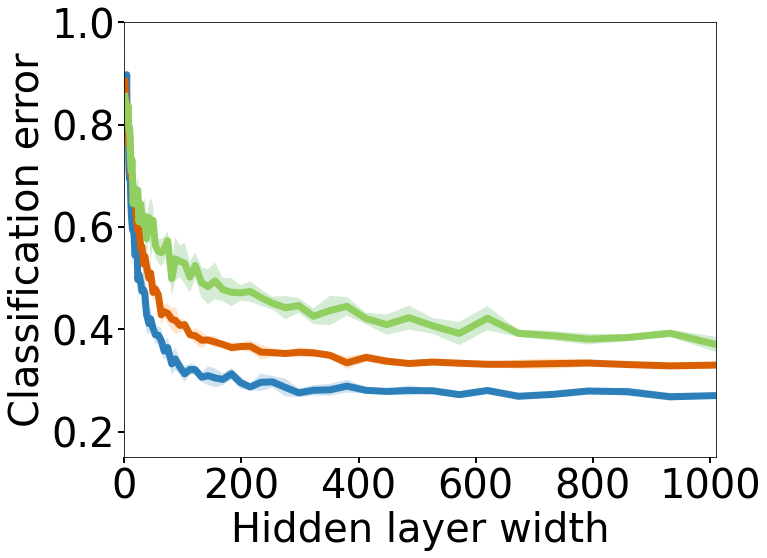

In [4]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
models = ['V1', 'classical', 'mistuned']
labels = {'V1': 'V1-inspired', 'classical': 'classical', 'mistuned': 'mistuned'}

# load with good params
t, l = 5, 2
with open(data_dir + '/models/results/mnist_clf/mnist_clf_t=%0.2f_l=%0.3f_few_shot_svc.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)

# load with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/mnist_clf/mnist_clf_t=%0.2f_l=%0.3f_few_shot_svc.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
    results['mistuned'] = results_mistuned['V1']
    
colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_err = results[m]['avg_test_err']
    std_err = results[m]['std_test_err']
    plt.plot(n_features, avg_err, markersize=4, label=labels[m], lw=7, c=colors[m])
    plt.fill_between(n_features, avg_err - std_err, avg_err + std_err, alpha=0.2)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 2200, 200))
plt.ylim([0.15, 1.00])
plt.xlim([0, 1010])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig('results/paper_figs/figure_6/MNIST_fewshot_results.pdf')

print('V1', results['V1']['avg_test_err'][65])
print('classical', results['classical']['avg_test_err'][65])
print('mistuned', results['mistuned']['avg_test_err'][65])

In [5]:
list(zip(n_features, results['V1']['avg_test_err']))

[(1, 0.84092),
 (2, 0.83812),
 (3, 0.8432600000000001),
 (4, 0.8978399999999999),
 (5, 0.7790600000000001),
 (6, 0.78606),
 (7, 0.7795799999999999),
 (8, 0.7091200000000001),
 (9, 0.6942),
 (10, 0.70052),
 (11, 0.65308),
 (12, 0.62512),
 (13, 0.60756),
 (14, 0.59498),
 (15, 0.6123200000000001),
 (17, 0.5766),
 (18, 0.54504),
 (20, 0.54538),
 (22, 0.55108),
 (23, 0.49724),
 (25, 0.5068),
 (28, 0.4915),
 (30, 0.47476),
 (33, 0.47736),
 (35, 0.47008),
 (38, 0.42864),
 (42, 0.41122),
 (45, 0.42069999999999996),
 (49, 0.4022),
 (53, 0.38948),
 (58, 0.38866000000000006),
 (63, 0.37862),
 (68, 0.35764000000000007),
 (74, 0.36452),
 (81, 0.33252000000000004),
 (87, 0.34218000000000004),
 (95, 0.32594),
 (103, 0.31323999999999996),
 (112, 0.32177999999999995),
 (121, 0.32132000000000005),
 (132, 0.30648),
 (143, 0.30952),
 (155, 0.30514),
 (168, 0.30223999999999995),
 (183, 0.31334),
 (198, 0.29626),
 (215, 0.28738),
 (233, 0.29657999999999995),
 (253, 0.29744000000000004),
 (275, 0.28652000000

## kMNIST fewshot

V1 0.6155600000000001
classical 0.6587799999999999
mistuned 0.66524


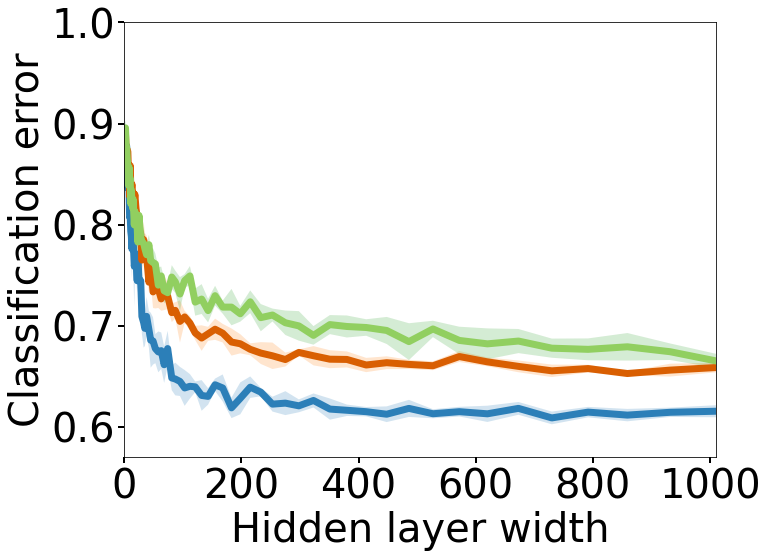

In [8]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
models = ['V1', 'classical', 'mistuned']
labels = {'V1': 'V1-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 


# load with good params
t, l = 5, 2
with open(data_dir + '/models/results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f_few_shot.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
    
# load with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f_few_shot.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
results['mistuned'] = results_mistuned['V1']

colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_err = results[m]['avg_test_err']
    std_err = results[m]['std_test_err']
    plt.plot(n_features, avg_err, markersize=4, label=labels[m], lw=7, c=colors[m])
    plt.fill_between(n_features, avg_err - std_err, avg_err + std_err, alpha=0.2)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(np.arange(0, 2200, 200))
plt.ylim([0.57, 1.0])
plt.xlim([0, 1010])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig('results/paper_figs/figure_6/kMNIST_fewshot_results.pdf')

print('V1', results['V1']['avg_test_err'][65])
print('classical', results['classical']['avg_test_err'][65])
print('mistuned', results['mistuned']['avg_test_err'][65])

In [9]:
list(zip(n_features, results['V1']['avg_test_err']))

[(1, 0.8625400000000001),
 (2, 0.8765600000000001),
 (3, 0.87604),
 (4, 0.8779399999999999),
 (5, 0.85944),
 (6, 0.83618),
 (7, 0.85976),
 (8, 0.8366399999999998),
 (9, 0.8076000000000001),
 (10, 0.8081200000000001),
 (11, 0.79362),
 (12, 0.78842),
 (13, 0.77596),
 (14, 0.7853600000000001),
 (15, 0.78664),
 (17, 0.75876),
 (18, 0.76326),
 (20, 0.76434),
 (22, 0.74458),
 (23, 0.77088),
 (25, 0.74642),
 (28, 0.74448),
 (30, 0.7092799999999999),
 (33, 0.7031599999999999),
 (35, 0.6975199999999999),
 (38, 0.70938),
 (42, 0.6961999999999999),
 (45, 0.6858199999999999),
 (49, 0.6850400000000001),
 (53, 0.6774800000000001),
 (58, 0.67422),
 (63, 0.67546),
 (68, 0.66152),
 (74, 0.67752),
 (81, 0.64846),
 (87, 0.64742),
 (95, 0.6450199999999999),
 (103, 0.6385799999999999),
 (112, 0.6402),
 (121, 0.63968),
 (132, 0.63116),
 (143, 0.6302199999999999),
 (155, 0.6417200000000001),
 (168, 0.63856),
 (183, 0.6188800000000001),
 (198, 0.62828),
 (215, 0.63934),
 (233, 0.63446),
 (253, 0.62256),
 (275